* Tensor는 파이토치의 기본 단위이며, GPU 연산을 가능하게 한다.
* 또한 Numpy의 배열과 유사하여 손쉽게 다룰 수 있다.

In [1]:
import torch
import numpy as np

x = torch.empty(5,4) # 5x4인 빈 텐서를 생성한다. 이때 초기화되진 않아서, 해당 시점에 할당된 메모리에 존재하던 값들이 초깃값으로 나타난다.
print(x)

tensor([[4.1589e+21, 2.8295e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 2.6375e+30, 1.1210e-43, 2.9217e-41],
        [1.6816e+20, 4.4254e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 7.3680e+28, 4.4248e+30, 1.8545e+25],
        [1.7539e+19, 1.6635e+22, 7.1434e+22, 7.4937e+31]])


In [2]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
torch.zeros(2)

tensor([0., 0.])

* torch.tensor()를 통해 텐서로 변환이 가능하다.




In [7]:
I = [13, 4] # 리스트 생성
r = np.array([4, 56, 7]) # 넘파이 배열 생성

In [9]:
torch.tensor(I)

tensor([13,  4])

In [8]:
torch.tensor(r)

tensor([ 4, 56,  7])

### 텐서의 크기, 타입, 연산



In [11]:
x = torch.empty(5,4)

x.size()

torch.Size([5, 4])

In [12]:
x.size()[1]

4

In [13]:
type(x)

torch.Tensor

In [14]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x + y

tensor([[1.0611, 0.7236],
        [0.9495, 1.2812]])

In [15]:
torch.add(x,y)

tensor([[1.0611, 0.7236],
        [0.9495, 1.2812]])

In [16]:
y.add(x)

tensor([[1.0611, 0.7236],
        [0.9495, 1.2812]])

In [17]:
y.add_(x)

tensor([[1.0611, 0.7236],
        [0.9495, 1.2812]])

### 텐서의 크기 변환

In [18]:
x = torch.rand(8,8) # 8x8 랜덤 행렬.
print(x.size())

torch.Size([8, 8])


In [19]:
a = x.view(64) # 크기를 바꿔주는 view 8x8 -> 64.
print(a.size())

torch.Size([64])


In [20]:
b = x.view(-1,4,4) # -1은 원래 크기가 되게 하는 값 8x8 -> -1x4x4 즉, 4x4x4이다.
print(b.size())

torch.Size([4, 4, 4])


### 텐서에서 넘파이 배열로 변환

In [21]:
x = torch.rand(8,8)
y = x.numpy() # 텐서 뒤에 .numpy()만 붙여주면 넘파이 배열로 변환된다.
type(y)

numpy.ndarray

### 단일 텐서에서 값으로 변환하기



In [22]:
x = torch.ones(1)
print(x.item())

1.0


# 역전파
* 모델 파라미터의 최적화는 미분의 성질과 연쇄법칙을 기반으로 하는 역전파를 통해 진행된다.
* 역전파는 모델이 복잡할수록 계산 과정이 복잡해져 코드를 직접 구현하는 것이 어렵다.
* 따라서 파이토치는 간단하게 사용할 수 있는 다양한 최적화 방법을 제공하기 때문에 우리는 파이토치를 지금 학습하고 있는 것이다.

### 그래디언트 텐서
* 인공 신경망의 최적화는 손실함수의 최솟값이 나오게 하는 신경망의 최적 가중치를 찾는 과정이다.
* 최적화를 위해 변화량을 나타내는 미분은 필수적인 요소이다.
* 깊은 인공 신경망의 구조는 입력값이 들어와 다중의 층을 지나 출력값을 산출하는 합성 함수 형태이다.
* 층이 깊어지거나 구조가 복잡할수록 계산이 복잡해지기 때문에 사람이 직접 계산하기는 매우 힘들다.
* 파이토치는 앞서 언급한 일련에 계산 과정을 자동으로 해주는 자동 미분 계산 함수를 제공하고 있다.

In [27]:
import torch

# required_grad = True는 해당 텐서를 기준으로 모든 연산들을 추적하여 미분값의 모임(배열)을 계산할 수 있게 한다.
x = torch.ones(2,2,requires_grad=True)
y = x+1
z = 2*y**2
r = z.mean()
print("Result: ", r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


In [28]:
# r을 기준으로 역전파를 진행하겠다는 것이다. dr/dx=x+1
r.backward()
# 모든 x의 성분이 1이므로 그래디언트 x.grad를 통해 나온 미분값은 모두 2이다.
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


### 자동 미분 - 선형회귀식

In [30]:
import torch
from matplotlib import pyplot as plt

In [33]:
x = torch.FloatTensor(range(5)).unsqueeze(1) # 1번째 위치의 차원을 늘려주는 역할을 한다. 최종적으로 x의 크기는 torch.Size(5,1)
y = 2*x+torch.rand(5,1)
# 여기서 "5, 1"은 텐서의 형태(shape)를 정의하는 것으로, 이 경우에는 5행 1열의 2차원 텐서를 생성한다.
# 각 요소는 0과 1 사이의 무작위 실수(float) 값이다.
num_features = x.shape[1]

* 우리의 목표는 xw + b가 잘 예측할 수 있는 w와 b를 찾는 것이다.
* w와 b에 requires_grad를 True로 활성화시켜 역전파를 통해 최적값을 찾는다.
* "requires_grad=True"는 PyTorch에서 해당 텐서에 대한 기울기(gradient) 계산이 필요하다는 것을 의미한다.
* 기본적으로, PyTorch는 연산 그래프를 통해 텐서에 대한 연산을 추적하고, 이를 바탕으로 자동으로 기울기를 계산하는 기능을 제공한다.
* 이를 "자동 미분"이라고 부른다.

In [36]:
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

* 가중치를 업데이트하는 최적화 방법은 매우 다양하다.
* 그중 가장 널리 사요되는 방법이 경사하강법이다.
* 경사하강법(Gradient descent)은 목적 함수인 손실 함수를 기준으로 그래디언트를 계산하여 변수를 최적화하는 기법이다.
* 아래 예시에서는 가장 기본적인 최적화 방법인 확률적 경사하강법(SGD)을 사용한다.

In [37]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

* 학습률은 경사 하강법(gradient descent)에서 가중치를 업데이트하는 정도를 결정한다. 너무 크면 수렴하지 못하고, 너무 작으면 학습이 느려질 수 있다.
* 최적화 알고리즘으로 확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 선택하고, 가중치 'w'와 편향 'b'를 최적화 대상으로 설정한다. 'lr'은 learning rate를 의미한다.

In [40]:
loss_stack = []
for epoch in range(1001): # 학습 반복 수를 1001로 한다.

  optimizer.zero_grad()
  y_hat = torch.matmul(x,w)+b
  loss = torch.mean((y_hat-y)**2) # 실제 값 'y'와 예측값 'y_hat'의 차이를 제곱한 후 평균을 내어 손실(loss)을 계산한다.
  loss.backward() # 손실에 대한 기울기를 계산한다. 이는 역전파(backpropagation) 과정을 수행한다.
  optimizer.step() # 계산된 기울기를 사용하여 모델의 가중치와 편향을 업데이트한다.
  loss_stack.append(loss.item()) # 매 에폭마다 손실 함수 값을 저장한다.

  if epoch%100==0:
    print(f'Epoch{epoch}:{loss.item()}') # 100 에폭마다 현재 에폭 수와 그 때의 손실 값을 출력한다.

Epoch0:0.3325485289096832
Epoch100:0.3005737066268921
Epoch200:0.2721979320049286
Epoch300:0.247016042470932
Epoch400:0.22466854751110077
Epoch500:0.20483651757240295
Epoch600:0.18723660707473755
Epoch700:0.17161765694618225
Epoch800:0.1577567756175995
Epoch900:0.145456001162529
Epoch1000:0.13453984260559082


### PyTorch에서 기울기를 0으로 초기화하는 이유
* 기울기를 누적하는 이유는 일반적으로 미니 배치(mini-batch) 학습을 진행할 때, 각 배치에서 계산된 기울기를 모두 더한 후에 가중치를 업데이트하는 방식을 사용하기 때문이다.
* 이렇게 하면 모든 학습 데이터를 한 번에 처리하는 것보다 훨씬 효율적으로 학습을 진행할 수 있다.
* 그러나, 매 에폭마다 새로운 학습을 시작할 때는 이전 에폭에서 누적된 기울기가 현재 에폭의 학습에 영향을 주지 않도록 초기화해야 한다.
* 따라서, 매 에폭 시작 시에 optimizer.zero_grad()를 호출하여 기울기를 0으로 초기화하는 것이 필요하다.

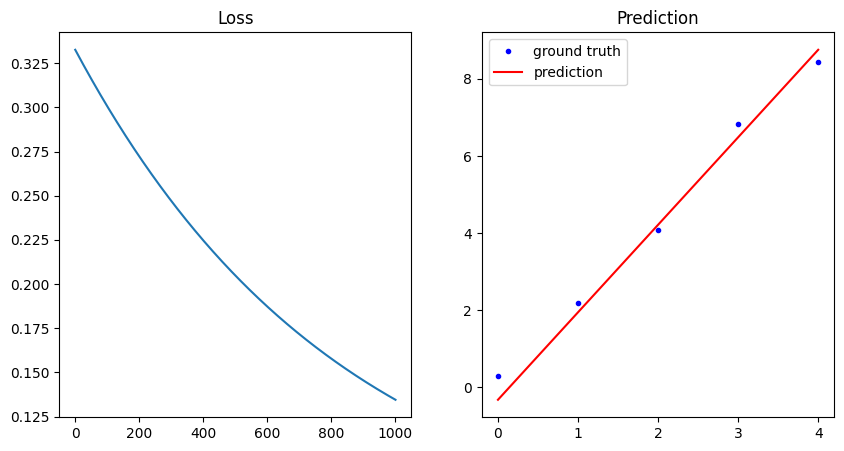

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x.detach().numpy(), y_hat.detach().numpy(), 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()

### 데이터 불러오기
* 한 번에 전체 데이터를 모델에 주어 학습하기보다 일반적으로 배치 형태의 묶음으로 데이터를 나누어 모델 학습에 이용한다.
* 모델을 학습할 때 데이터의 특징과 사용 방법에 따라 학습 성능의 차이가 날 수 있다.

In [48]:
import torch
import torchvision
import torchvision.transforms as tr
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [52]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()]) # 16x16으로 이미지 크기 변환 후 텐서 타입으로 변환한다.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transf) # CIFAR10 데이터를 불러온다. train 데이터를 불러온다.
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf) # 테스트 데이터를 불러온다. 미리 선언한 전처리를 사용한다.

Files already downloaded and verified
Files already downloaded and verified


* 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태다.
* trainset[0]은 학습 데이터의 첫 번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
* trainset[0][0]은 이미지이며, trainset[0][1]은 라벨이다.
* 현재 이미지 사이즈는 3x16x16이다. 여기서 3은 채널 수를 말하고, 16x16은 이미지의 너비와 높이를 의미한다.
* 일반적인 컬러 사진은 RGB 이미지이기 때문에 채널이 3이고, (너비)x(높이)x(채널 수)로 크기가 표현된다.
* 하지만 파이토치에서는 이미지 한 장이 (채널 수)x(너비)x(높이)로 표현되니 유의하도록 한다.

In [53]:
print(trainset[0][0].size())

torch.Size([3, 16, 16])


In [54]:
trainset[0]

(tensor([[[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863,
           0.4824, 0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
          [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902,
           0.4667, 0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
          [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196,
           0.4000, 0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
          [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059,
           0.5294, 0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
          [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608,
           0.6392, 0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.5020],
          [0.5882, 0.5686, 0.5137, 0.4784, 0.4784, 0.4471, 0.4980, 0.5804,
           0.6078, 0.6118, 0.6549, 0.5333, 0.4824, 0.5255, 0.5294, 0.5216],
          [0.5765, 0.5608, 0.4706, 0.3569, 0.4275, 0.6667, 0.7373, 0.8157,
           0.8275, 

In [55]:
trainset[0][0]

tensor([[[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863,
          0.4824, 0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
         [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902,
          0.4667, 0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
         [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196,
          0.4000, 0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
         [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059,
          0.5294, 0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
         [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608,
          0.6392, 0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.5020],
         [0.5882, 0.5686, 0.5137, 0.4784, 0.4784, 0.4471, 0.4980, 0.5804,
          0.6078, 0.6118, 0.6549, 0.5333, 0.4824, 0.5255, 0.5294, 0.5216],
         [0.5765, 0.5608, 0.4706, 0.3569, 0.4275, 0.6667, 0.7373, 0.8157,
          0.8275, 0.8118, 0.7843

In [56]:
trainset[0][1]

6

* DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
* 따라서 배치 데이터에 관한 배치 사이즈 및 셔플 여부 등을 선택할 수 있다.
* batch_size = 50, shuffle=True은 무작위로 데이터를 섞어 한 번에 50개의 이미지를 묶은 배치로 제공하겠다는 의미이다.

In [57]:
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [60]:
len(trainloader) # CIFAR10 의 학습 이미지는 50000장이고, 배치 사이즈가 50장이므로 1000은 배치의 개수가 된다.

1000

In [68]:
images, labels = next(iter(trainloader))
print(images.size()) # 배치 사이즈는 (배치 크기)x(채널 수)x(너비)x(높이)를 의미한다. 즉 배치 하나에 이미지 50개가 잘 들어가 있음을 알 수 있다.

torch.Size([50, 3, 16, 16])


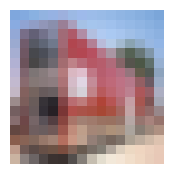

In [69]:
# image[1]의 크기는 (3,16,16)이다.
# 이때 그림을 그려주기 위해서 채널 수가 가장 뒤로 가는 형태인 (16, 16, 3)을 만들어야 한다.
# permute(1,2,0)은 기존 차원의 위치인 0,1,2를 1,2,0으로 바꾸는 함수이다.
# 따라서 0번째의 크기가 3인 텐서를 마지막으로 보낸다.
# 마지막으로 numpy()를 이용해 넘파이 배열로 변환한다.
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

### 정리되지 않은 커스텀 데이터 불러오기
#### 커스텀 데이터 세트 예시
* 현재 32x32 크기인 RGB 컬러 이미지 100장과 그에 대한 라벨이 되어 있고 넘파이 배열로 정리가 되어 있다고 가장하자.

In [83]:
# 0 부터 255까지의 정수 중에서 임의로 선택하여 (100, 32, 32, 3)의 크기를 가지는 넘파이 배열을 생성하고, 255로 나누어 준다.
# 이렇게 하면 픽셀 값의 범위가 0에서 1 사이가 된다.
# 여기서 (100, 32, 32, 3)은 각각 이미지의 개수, 이미지의 너비, 이미지의 높이, 채널 수를 나타낸다.
train_images = np.random.randint(256, size=(100,32,32,3))/255

# 이 부분은 0 또는 1 중에서 임의로 선택하여 (100, 1)의 크기를 가지는 넘파이 배열을 생성한다.
# 이 배열은 각 이미지의 레이블을 나타낸다.
train_labels = np.random.randint(2, size=(100, 1))

# 이 코드는 100개의 32x32 크기의 RGB 이미지 데이터와 이에 대응하는 레이블 데이터를 생성하는 역할을 한다.

In [84]:
class TensorData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = torch.FloatTensor(x_data)
    self.x_data = self.x_data.permute(0,3,1,2)
    # 원래 이미지의 크기가 (100,32,32,3)이므로 permute(0,3,1,2) 함수를 통해 (100,3,32,32)으로 바꿔준다.
    # (이미지수)x(너비)x(높이)x(채널수) -> (배치크기)x(채널수)x(너비)x(높이)
    self.y_data = torch.LongTensor(y_data) # 이 부분은 입력받은 레이블 데이터(y_data)를 PyTorch의 LongTensor 타입으로 변환하는 작업을 의미한다.
    self.len = self.y_data.shape[0] # 이 부분은 레이블 데이터 self.y_data의 첫번째 차원의 크기, 즉 데이터 개수를 self.len에 저장하는 작업을 의미한다.

  def __getitem__(self, index): # 뽑아낼 데이터에 대해서 인덱스 처리를 하여 적어 준다.
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

In [85]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)